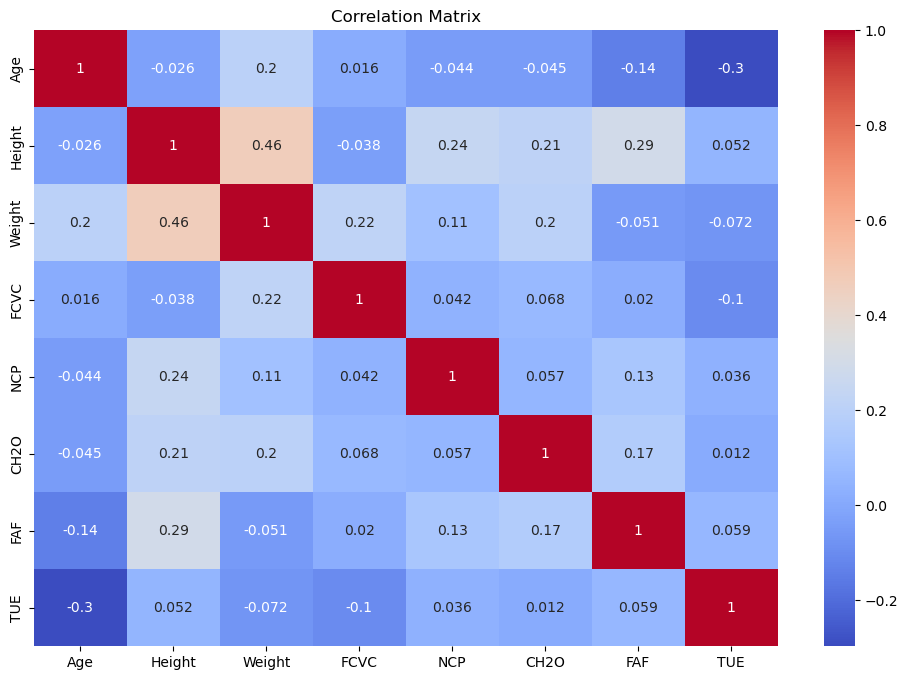


XGB Evaluation:
Accuracy: 96.22%
Precision: 96.53%
Recall: 96.22%
F1-Score: 96.25%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.85      0.98      0.91        58
           2       0.99      0.99      0.99        70
           3       0.97      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       1.00      0.90      0.95        58
           6       0.97      0.98      0.97        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.97      0.96      0.96       423



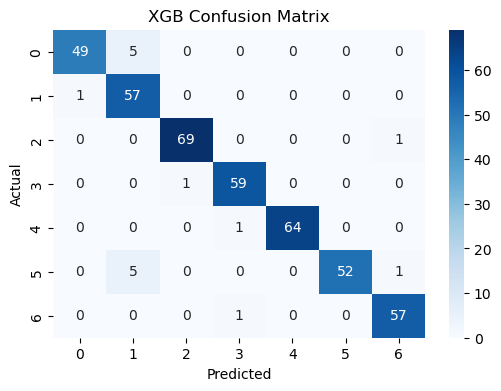

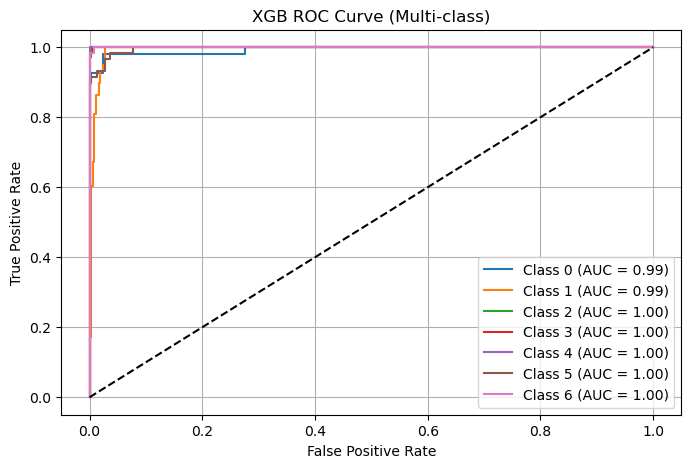


GB Evaluation:
Accuracy: 95.74%
Precision: 95.96%
Recall: 95.74%
F1-Score: 95.76%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.86      0.98      0.92        58
           2       0.97      0.94      0.96        70
           3       0.97      0.97      0.97        60
           4       1.00      1.00      1.00        65
           5       0.96      0.93      0.95        58
           6       0.97      0.98      0.97        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



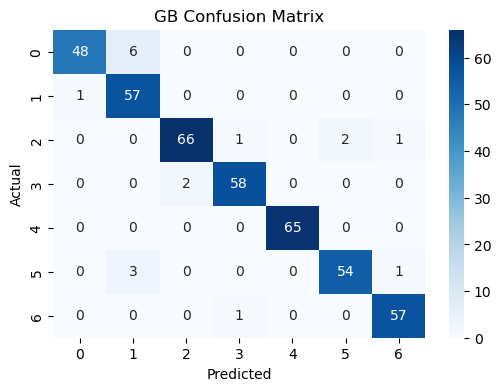

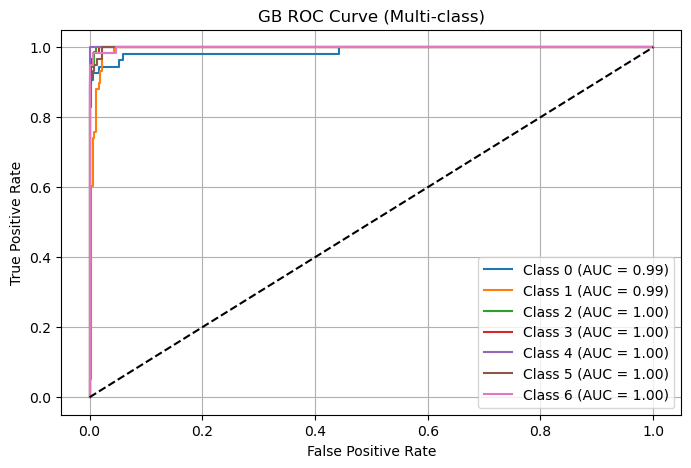


CB Evaluation:
Accuracy: 96.45%
Precision: 96.61%
Recall: 96.45%
F1-Score: 96.48%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.88      0.97      0.92        58
           2       0.96      0.99      0.97        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.95      0.90      0.92        58
           6       0.98      0.97      0.97        58

    accuracy                           0.96       423
   macro avg       0.97      0.96      0.96       423
weighted avg       0.97      0.96      0.96       423



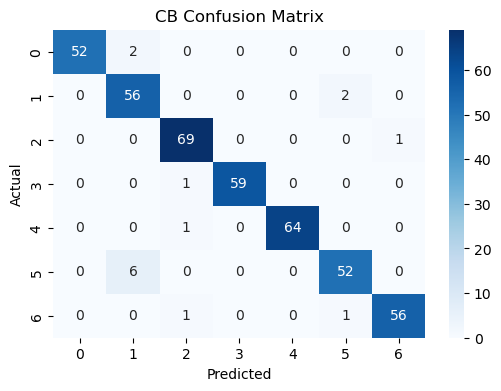

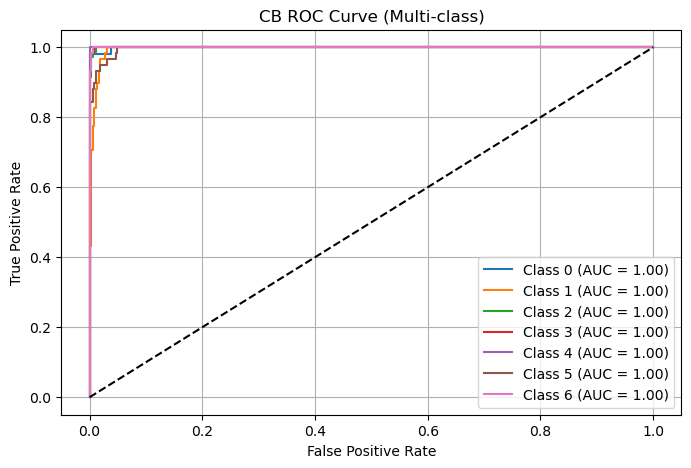


BDT Evaluation:
Accuracy: 96.93%
Precision: 97.28%
Recall: 96.93%
F1-Score: 96.95%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.85      1.00      0.92        58
           2       0.99      1.00      0.99        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       1.00      0.88      0.94        58
           6       0.98      1.00      0.99        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



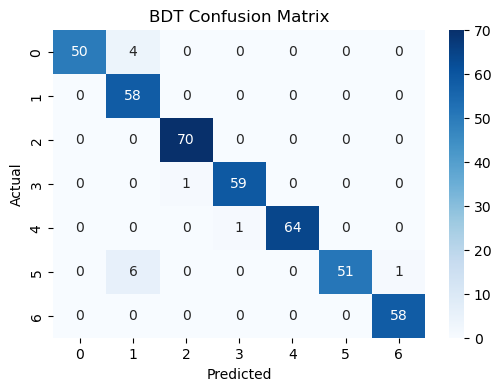

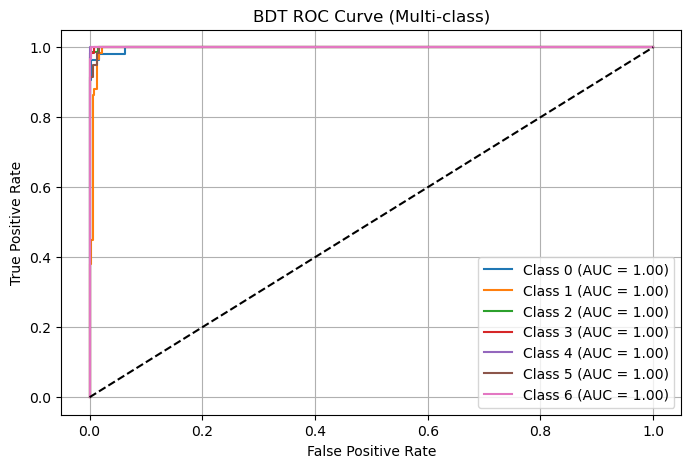


RF Evaluation:
Accuracy: 93.85%
Precision: 94.19%
Recall: 93.85%
F1-Score: 93.91%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.84      0.93      0.89        58
           2       0.88      0.97      0.93        70
           3       1.00      0.97      0.98        60
           4       1.00      0.98      0.99        65
           5       0.93      0.91      0.92        58
           6       0.96      0.90      0.93        58

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



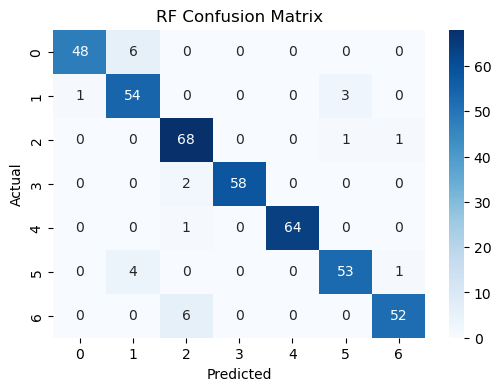

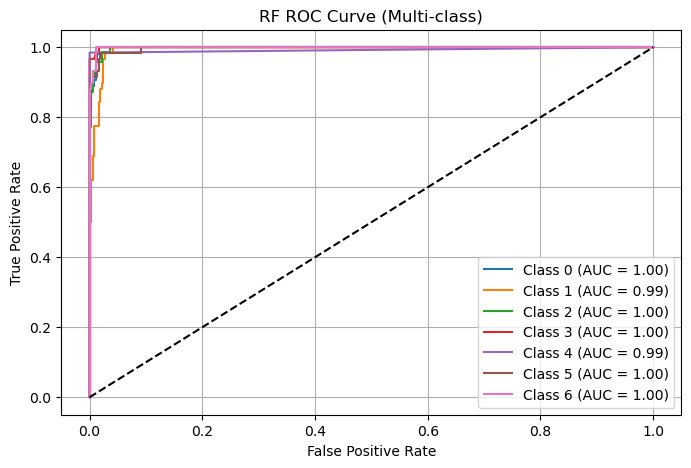


ET Evaluation:
Accuracy: 93.85%
Precision: 94.02%
Recall: 93.85%
F1-Score: 93.89%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.84      0.91      0.88        58
           2       0.93      0.97      0.95        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.88      0.86      0.87        58
           6       0.95      0.90      0.92        58

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



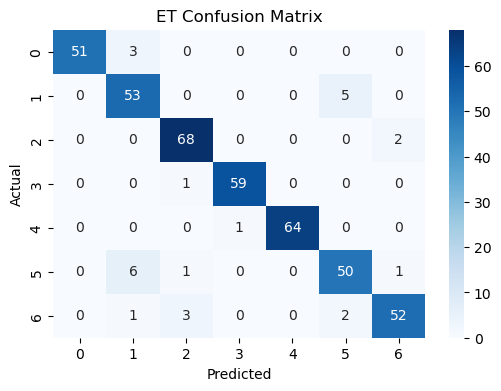

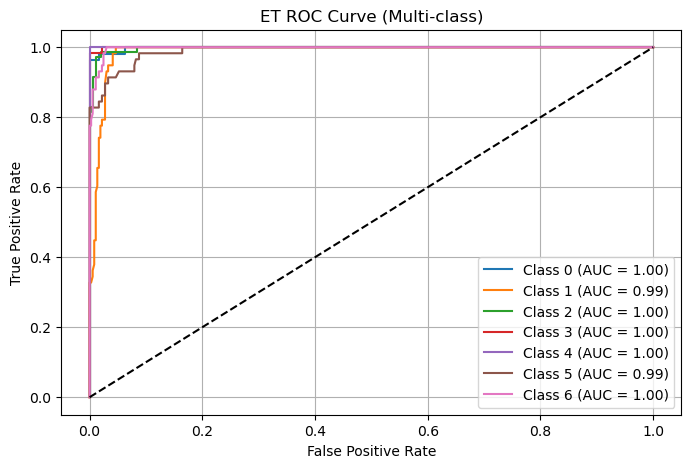


VC Evaluation:
Accuracy: 89.83%
Precision: 90.00%
Recall: 89.83%
F1-Score: 89.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90        54
           1       0.77      0.83      0.80        58
           2       0.91      0.90      0.91        70
           3       0.97      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.88      0.84      0.86        58
           6       0.83      0.86      0.85        58

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.90      0.90      0.90       423



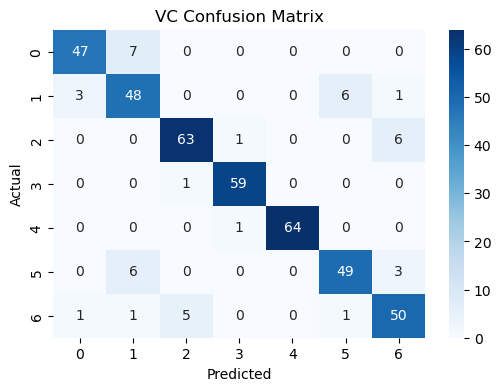

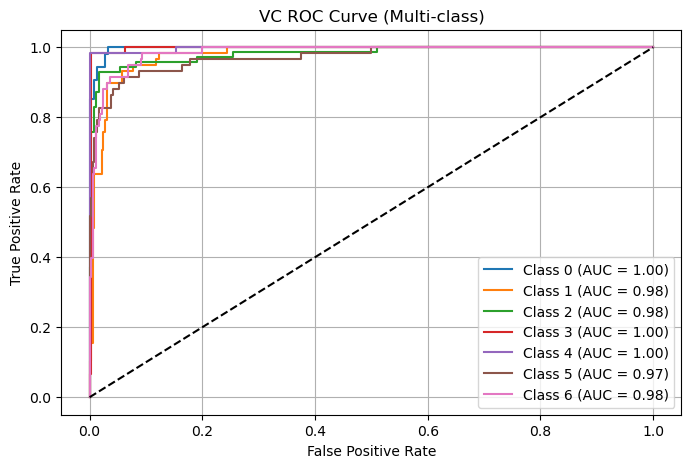


--- Obesity Risk Prediction ---


In [ ]:
## Obesity Risk Prediction using Ensemble Learning
# Author: ChatGPT (customized for Mahasarabesh)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import xgboost as xgb
from catboost import CatBoostClassifier

# Load dataset
col_names = ["Gender", "Age", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC",
             "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"]
data = pd.read_csv("ObesityDataSet.csv", names=col_names, header=0)
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Label Encoding
encoder = LabelEncoder()
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# Outlier handling (Age and NCP)
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_val = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_val, df[col])
    return df

for col in ['Age', 'NCP']:
    data = remove_outliers_iqr(data, col)

# Feature Scaling
target = 'NObeyesdad'
features = data.columns.tolist()
features.remove(target)
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Split data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Base models
models = {
    'XGB': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42,
                             colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5,
                             min_child_weight=1, n_estimators=1000, subsample=0.8),
    'GB': GradientBoostingClassifier(random_state=45, learning_rate=0.1, max_depth=5, n_estimators=500),
    'CB': CatBoostClassifier(verbose=0, thread_count=-1, random_state=45, depth=6, learning_rate=0.1,
                             min_data_in_leaf=50, n_estimators=1000),
    'BDT': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42, n_jobs=-1,
                             bootstrap_features=True, n_estimators=500),
    'RF': RandomForestClassifier(random_state=42, max_depth=None, max_features=None, n_estimators=1000),
    'ET': ExtraTreesClassifier(random_state=42, max_depth=None, min_samples_split=2, n_estimators=500),
    'VC': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ], voting='soft')
}

# Binarize labels for ROC
y_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name} Evaluation:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc*100:.2f}%")
    print(f"Precision: {prec*100:.2f}%")
    print(f"Recall: {rec*100:.2f}%")
    print(f"F1-Score: {f1*100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve (multi-class, class-wise)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        plt.figure(figsize=(8, 5))
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'{name} ROC Curve (Multi-class)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.grid()
        plt.show()

# Save models
save_dir = 'D:\mini_project1'
os.makedirs(save_dir, exist_ok=True)
for name, model in models.items():
    with open(os.path.join(save_dir, f'{name}.pkl'), 'wb') as f:
        pickle.dump(model, f)

# Load models
loaded_models = {}
for name in models.keys():
    with open(os.path.join(save_dir, f'{name}.pkl'), 'rb') as f:
        loaded_models[name] = pickle.load(f)

# User prediction input
print("\n--- Obesity Risk Prediction ---")
input_prompts = {
    'Gender': "Enter Gender (Male/Female): ",
    'Age': "Enter Age (e.g. 23): ",
    'Height': "Enter Height in meters (e.g. 1.75): ",
    'Weight': "Enter Weight in kg (e.g. 70): ",
    'family_history_with_overweight': "Family history with overweight? (yes/no): ",
    'FAVC': "Frequent consumption of high caloric food? (yes/no): ",
    'FCVC': "Frequency of vegetable consumption (0-3): ",
    'NCP': "Number of main meals (1-4): ",
    'CAEC': "Consumption of food between meals? (no/Sometimes/Frequently/Always): ",
    'SMOKE': "Do you smoke? (yes/no): ",
    'CH2O': "Daily water intake (liters): ",
    'SCC': "Do you monitor calories? (yes/no): ",
    'FAF': "Physical activity frequency (hours/week): ",
    'TUE': "Time using technology devices (hours/day): ",
    'CALC': "Alcohol consumption (no/Sometimes/Frequently/Always): ",
    'MTRANS': "Transportation method (Automobile/Motorbike/Bike/Public_Transportation/Walking): "
}

user_vals = {}
for feat in features:
    val = input(input_prompts[feat])
    if feat in encoders:
        val = encoders[feat].transform([val])[0]
    else:
        val = float(val)
    user_vals[feat] = val

user_df = pd.DataFrame([user_vals])
user_df[features] = scaler.transform(user_df[features])

# Final predictions
print("\n--- Prediction Results ---")
decode_label = lambda code: encoders[target].inverse_transform([int(code)])[0]

for name, model in loaded_models.items():
    pred = model.predict(user_df)[0]
    print(f"{name} predicts: {decode_label(pred)} (code {pred})")
